In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import sharedVariable as shv

In [3]:
outMergedDir='/cellar/users/btsui/Data/SRA/microbes/'+'microbes'


In [4]:
#!ls -lah /cellar/users/btsui/Data/SRA/microbes/

In [4]:
### TPM

In [5]:
inMicrobDf=shv.loadDf(outMergedDir)

In [6]:
##fasta header 
tmpS=pd.DataFrame.from_csv( '/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/Analysis/viral_header.fa',sep='\t',header=None).index.to_series()

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [7]:
ncbiToNameDf=tmpS.str.extract('^>(?P<NCBI_ID>NC_\d+\.\d+)(?P<name>.*)')

In [8]:
myNCBI_Ids=ncbiToNameDf[ncbiToNameDf['name'].str.contains('Human papillomavirus',case=False).fillna(False)]['NCBI_ID']

In [9]:
ppv=inMicrobDf.loc[myNCBI_Ids.values]

In [10]:
ppv_Sum=ppv.sum(axis=0).dropna()

### vector for read counts that fell onto HPV

In [11]:
ppv_Sum.head()

Run
SRR3090605        0.0
SRR3175295    14065.0
SRR5225761        0.0
SRR1551031       10.0
SRR794361         0.0
dtype: float32

### load in meta data

In [12]:
sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'

technical_meta_data_df=pd.read_pickle(sra_dump_pickle_dir)

In [13]:
metaDataMappingSDir='/cellar/users/btsui/Data/nrnb01_nobackup/METAMAP//input/allAttrib.v5.csv.NCI.prefilter.pyc'
bio_metaDf=pd.read_pickle(metaDataMappingSDir)

# Check for the known: HeLa cells are expected to have higher # of reads from HPV genome

In [14]:
queryCellTypes=['HeLa','HeLa S3']

In [15]:
hitSrs=bio_metaDf[bio_metaDf['NciEng'].isin(queryCellTypes)]

In [16]:
hitSrrDf=technical_meta_data_df[technical_meta_data_df['Sample'].isin(hitSrs.srs.unique())]

In [36]:
yLabel='# of reads mapped\n onto HPV genome'
hueLabel='Sequencing done on HeLa cells'
tmpDf=np.log2(ppv_Sum.to_frame(name=yLabel)+1)

In [37]:
tmpDf[hueLabel]=tmpDf.index.isin(hitSrrDf.index)

In [38]:
import matplotlib.pyplot as plt

Text(0.5,0,'')

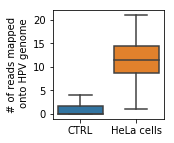

In [41]:
fig,ax=plt.subplots(figsize=(2,2))
sns.boxplot(data=tmpDf,x=hueLabel,y=yLabel,showfliers=False)
ax.set_xticklabels(['CTRL','HeLa cells'])
ax.set_xlabel('')

In [22]:
from scipy import stats
stats.ttest_ind(tmpDf[yLabel][tmpDf[hueLabel]].dropna(),tmpDf[yLabel][~tmpDf[hueLabel]].dropna())

Ttest_indResult(statistic=241.60495911866738, pvalue=0.0)

In [5]:
!grep -rn microbes *.ipynb

ExampleSNPSliceForJisoo.ipynb:1384:       "Soil inhabiting microbes                    1\n",
checkMicrobiome.ipynb:29:    "outMergedDir='/cellar/users/btsui/Data/SRA/microbes/'+'microbes'\n"
checkMicrobiome.ipynb:38:    "#!ls -lah /cellar/users/btsui/Data/SRA/microbes/"
